# Introduction to Sabermetrics

To begin, let's use the `Pandas` library to determine some basic descriptive information about some given seasons, and create columns to compute the **batting average** of players.  We will use data from the Lahman database.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [4]:
import seaborn as sns

In [5]:
df = pd.read_csv('data/lahman/Batting.csv')

In [6]:
df.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104324 entries, 0 to 104323
Data columns (total 22 columns):
playerID    104324 non-null object
yearID      104324 non-null int64
stint       104324 non-null int64
teamID      104324 non-null object
lgID        103586 non-null object
G           104324 non-null int64
AB          104324 non-null int64
R           104324 non-null int64
H           104324 non-null int64
2B          104324 non-null int64
3B          104324 non-null int64
HR          104324 non-null int64
RBI         103568 non-null float64
SB          101956 non-null float64
CS          80832 non-null float64
BB          104324 non-null int64
SO          97974 non-null float64
IBB         67722 non-null float64
HBP         101507 non-null float64
SH          98255 non-null float64
SF          68259 non-null float64
GIDP        78921 non-null float64
dtypes: float64(9), int64(10), object(3)
memory usage: 17.5+ MB


According to the documentation, these are the variable descriptions:

- `playerID`       Player ID code
- `yearID`         Year
- `stint`          player's stint (order of appearances within a season)
- `teamID`         Team
- `lgID`           League
- `G`              Games
- `AB`             At Bats
- `R`              Runs
- `H`              Hits
- `2B`             Doubles
- `3B`             Triples
- `HR `            Homeruns
- `RBI`            Runs Batted In
- `SB`             Stolen Bases
- `CS`             Caught Stealing
- `BB`             Base on Balls
- `SO`             Strikeouts
- `IBB`            Intentional walks
- `HBP`            Hit by pitch
- `SH`             Sacrifice hits
- `SF`             Sacrifice flies
- `GIDP`           Grounded into double plays


So, here are some questions:

1. Who has the most hits in a season?
2. Most homeruns?
3. What team had the most hits in 2011?
4. Does it seem to matter what league you're in as to the number of hits?

We will find that the hitting data doesn't contain very detailed information about the players, so we will use the additional player table to then find the players first and last name.

In [23]:
df.nlargest(1, 'H')

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
85828,suzukic01,2004,1,SEA,AL,161,704,101,262,24,...,60.0,36.0,11.0,49,63.0,19.0,4.0,2.0,3.0,6.0


In [24]:
player = pd.read_csv('data/lahman/People.csv')

In [25]:
player.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [26]:
df.nlargest(1, 'H').merge(player, on='playerID')[['yearID', 'nameGiven', 'H', 'nameLast', 'nameFirst']]

,yearID,nameGiven,H,nameLast,nameFirst
0,2004,Ichiro,262,Suzuki,Ichiro


In [27]:
df.nlargest(1, 'HR').merge(player, on='playerID')[['yearID', 'nameFirst', 'nameLast', 'HR']]

,yearID,nameFirst,nameLast,HR
0,2001,Barry,Bonds,73


## Looking For Relationships

An important quantity is Runs scored.  We want to explore variables for relationships to the runs scored.  First, let's consider some regular statistics that might be familiar.

### Batting Average

$$BA = \frac{\text{Hits}}{\text{At Bats}}$$

In [7]:
df['batting_average'] = df.H / df.AB

In [8]:
df.batting_average.mean()

0.20862018734214524

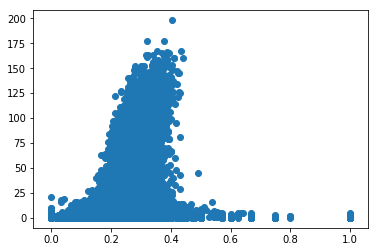

In [9]:
plt.scatter(df.batting_average, df.R)

In [10]:
teams = df.groupby('teamID')[['batting_average', 'R']].mean()

In [11]:
teams.head()

,batting_average,R
teamID,,
ALT,0.238714,5.000000
ANA,0.221224,18.709199
ARI,0.198155,15.910270
ATL,0.198994,16.662344
BAL,0.209805,17.086807


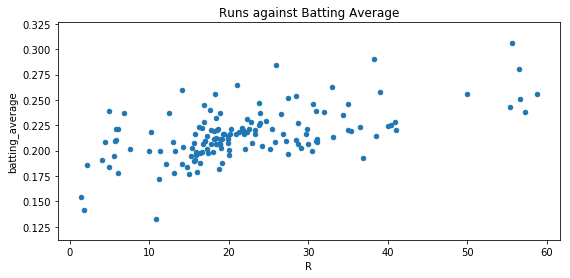

In [12]:
teams.plot.scatter('R', 'batting_average', figsize = (9, 4), title = 'Runs against Batting Average')

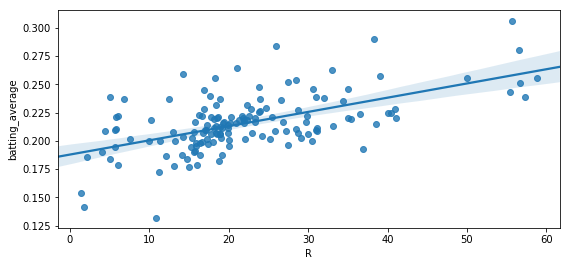

In [13]:
plt.figure(figsize = (9, 4))
sns.regplot('R', 'batting_average', data = teams)

In [14]:
def lin_reg_plot(df, x, y):
    lr = LinearRegression()
    lr.fit(df[x].values.reshape(-1,1), df[y])
    pred = lr.predict(df[x].values.reshape(-1,1))
    print('Score: ', lr.score(df[x].values.reshape(-1,1), df[y]))
    plt.figure(figsize = (9, 4))
    sns.regplot(x, y, data = df)

In [15]:
from sklearn.linear_model import LinearRegression

Score:  0.3326779630407175


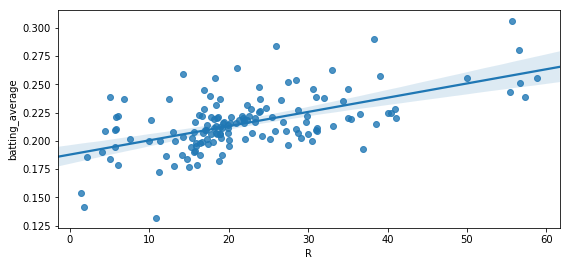

In [16]:
lin_reg_plot(teams, 'R', 'batting_average')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104324 entries, 0 to 104323
Data columns (total 23 columns):
playerID           104324 non-null object
yearID             104324 non-null int64
stint              104324 non-null int64
teamID             104324 non-null object
lgID               103586 non-null object
G                  104324 non-null int64
AB                 104324 non-null int64
R                  104324 non-null int64
H                  104324 non-null int64
2B                 104324 non-null int64
3B                 104324 non-null int64
HR                 104324 non-null int64
RBI                103568 non-null float64
SB                 101956 non-null float64
CS                 80832 non-null float64
BB                 104324 non-null int64
SO                 97974 non-null float64
IBB                67722 non-null float64
HBP                101507 non-null float64
SH                 98255 non-null float64
SF                 68259 non-null float64
GIDP          

In [18]:
run_counts = df[(df['yearID'] > 1954) & (df['yearID'] < 2012)].groupby(['yearID', 'teamID'])[['R', 'batting_average']].agg({'R': 'sum', 'batting_average': 'mean'})
ba= df[(df['yearID'] > 1954) & (df['yearID'] < 2012)].groupby(['yearID', 'teamID'])[['batting_average']].mean()

In [19]:
ba.shape

(1422, 1)

In [20]:
run_counts.shape

(1422, 2)

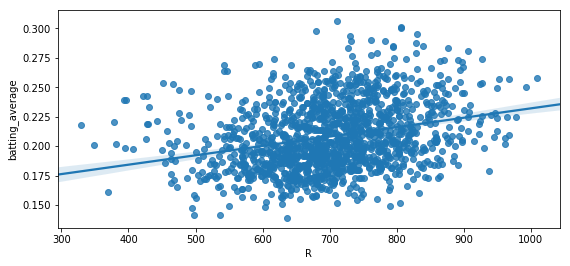

In [21]:
plt.figure(figsize = (9, 4))
sns.regplot( run_counts.R, run_counts.batting_average)

In [22]:
y = run_counts.batting_average
X = run_counts.R.values.reshape(-1,1)
lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y)

0.07777602996325228

In [23]:
lr.coef_

array([7.96023471e-05])

In [24]:
lr.intercept_

0.15241354901746035

In [46]:
X.shape

(1422, 1)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104324 entries, 0 to 104323
Data columns (total 23 columns):
playerID           104324 non-null object
yearID             104324 non-null int64
stint              104324 non-null int64
teamID             104324 non-null object
lgID               103586 non-null object
G                  104324 non-null int64
AB                 104324 non-null int64
R                  104324 non-null int64
H                  104324 non-null int64
2B                 104324 non-null int64
3B                 104324 non-null int64
HR                 104324 non-null int64
RBI                103568 non-null float64
SB                 101956 non-null float64
CS                 80832 non-null float64
BB                 104324 non-null int64
SO                 97974 non-null float64
IBB                67722 non-null float64
HBP                101507 non-null float64
SH                 98255 non-null float64
SF                 68259 non-null float64
GIDP          

In [25]:
players = df[df.AB > 40]

In [26]:
run_counts = players[(players['yearID'] > 1954) & (players['yearID'] < 2012)].groupby(['yearID', 'teamID'])[['R', 'batting_average']].agg({'R': 'sum', 'batting_average': 'mean'})
ba= players[(players['yearID'] > 1954) & (players['yearID'] < 2012)].groupby(['yearID', 'teamID'])[['batting_average']].mean()

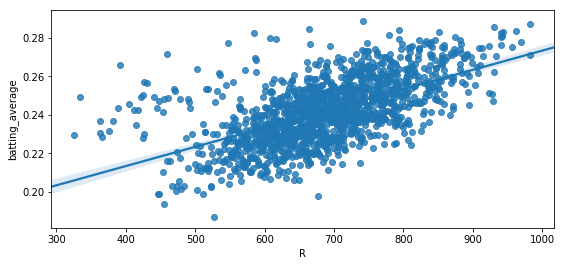

In [27]:
plt.figure(figsize = (9, 4))
sns.regplot( run_counts.R, run_counts.batting_average)

In [28]:
y = run_counts.batting_average
X = run_counts.R.values.reshape(-1,1)
lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y)

0.3571644589654342

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104324 entries, 0 to 104323
Data columns (total 23 columns):
playerID           104324 non-null object
yearID             104324 non-null int64
stint              104324 non-null int64
teamID             104324 non-null object
lgID               103586 non-null object
G                  104324 non-null int64
AB                 104324 non-null int64
R                  104324 non-null int64
H                  104324 non-null int64
2B                 104324 non-null int64
3B                 104324 non-null int64
HR                 104324 non-null int64
RBI                103568 non-null float64
SB                 101956 non-null float64
CS                 80832 non-null float64
BB                 104324 non-null int64
SO                 97974 non-null float64
IBB                67722 non-null float64
HBP                101507 non-null float64
SH                 98255 non-null float64
SF                 68259 non-null float64
GIDP          

In [29]:
ba = df.groupby(['teamID', 'yearID'])['H'].sum()/df.groupby('teamID')['AB'].sum()
r = df.groupby(['teamID', 'yearID'])['R'].sum()

In [30]:
mod = df[df.yearID > 1950]

In [31]:
teams_years = mod.groupby(['teamID', 'yearID'])[['H', 'R', '2B', '3B', 'HR', 'SF', 'AB', 'BB', 'HBP']].sum()

In [32]:
team = teams_years.reset_index()

### PROBLEM

Your goal is to explore the relationship between the Runs feature, and some additional metrics that we can construct from existing variable observations.  Which of the below metrics offers the strongest explanation for a teams Runs scored?

---


- Runs vs. Home Runs
- Runs vs. Home Runs Allowed
- Runs vs. Hits
- On Base Percentage vs. Runs

$$\text{On Base Percentage} = \frac{H + BB + HBP}{AB + BB + HBP + SF}$$

Note the numerator is referred to as **Total Bases**(TB)
- Slugging Percentage vs. Runs

$$\text{Slugging Percentage} = \frac{1B + 2B*2 + 3B*3 + HR*4}{AB}$$

- OPS

$$OPS = OBP + SLG$$

- Runs Created

$$\text{Runs Created} = \frac{(H + BB) * TB}{AB + BB}$$

In [33]:
def lin_reg_scorer(dataframe, independent_var, dependent_var):
    lm = LinearRegression()
    X = dataframe[[independent_var]]
    y = dataframe[dependent_var]
    lm.fit(X, y)
    score = lm.score(X, y)
    print('The score for {} is {}'.format(independent_var, score))

In [34]:
team.head()

,teamID,yearID,H,R,2B,3B,HR,SF,AB,BB,HBP
0,ANA,1997,1531,829,279,25,161,57.0,5628,617,45.0
1,ANA,1998,1530,787,314,27,147,41.0,5630,510,48.0
2,ANA,1999,1404,711,248,22,158,42.0,5494,511,43.0
3,ANA,2000,1574,864,309,34,236,43.0,5628,608,47.0
4,ANA,2001,1447,691,275,26,158,53.0,5551,494,77.0


In [35]:
team['on_base_pct'] = (team.H + team.BB + team.HBP)/(team.AB + team.BB + team.HBP + team.SF)

In [36]:
team['total_bases'] = team.H + team.BB + team.HBP

In [37]:
team['1B'] = team.H - (team['2B'] + team['3B'] + team['HR'])

In [38]:
team['slug'] = (team['1B'] + team['2B']*2 + team['3B']*3 + team['HR']*4 )/team.AB

In [39]:
team['OPS'] = team['on_base_pct'] + team['slug']

In [47]:
team['runs_created'] = ((team.H + team.BB)*team['total_bases'])/(team.AB + team.BB)

In [49]:
lm = LinearRegression()
lm.fit(team[['HR']], team['R'])
lm.score(team[['HR']], team['R'])

0.5514775431894781

In [42]:
for i in ['HR', 'on_base_pct', 'total_bases', 'slug', 'OPS', 'runs_created']:
    lin_reg_scorer(team, i, 'R')

The score for HR is 0.5514775431894781
The score for on_base_pct is 0.6092236181176507
The score for total_bases is 0.7823674858868356
The score for slug is 0.694613835492349
The score for OPS is 0.7502606856259435
The score for runs_created is 0.826993666549076


Score:  0.5514775431894781
Score:  0.6092236181176507
Score:  0.7823674858868356
Score:  0.694613835492349
Score:  0.7502606856259435
Score:  0.826993666549076


<Figure size 432x288 with 0 Axes>

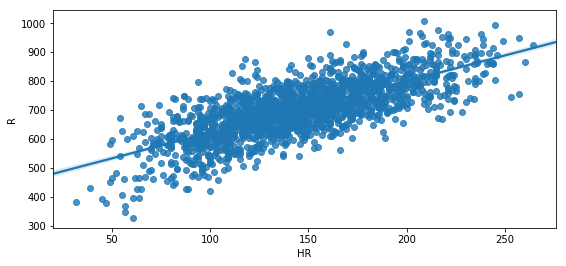

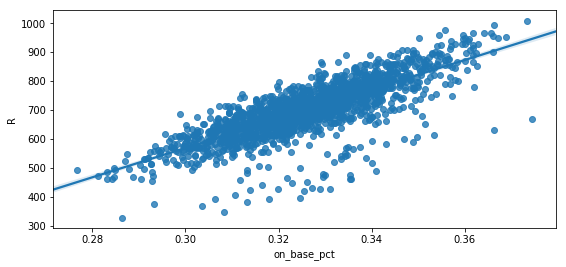

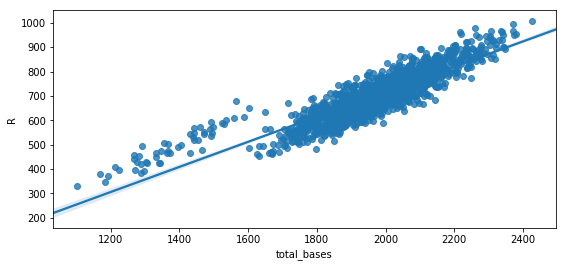

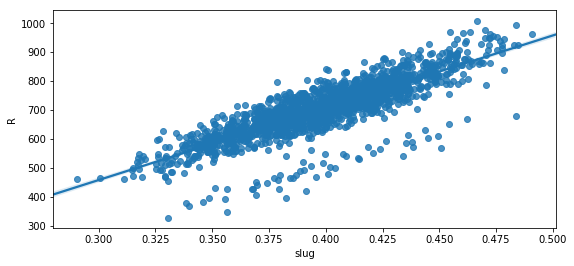

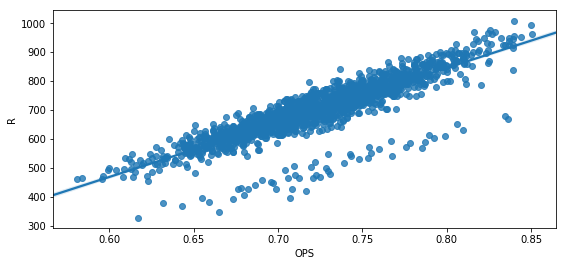

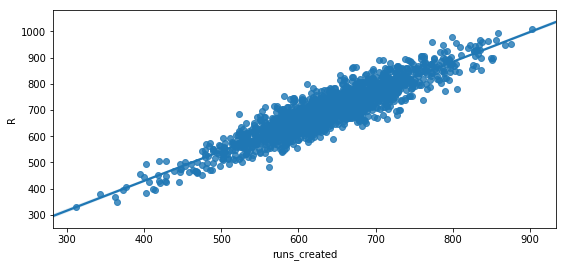

In [46]:
plt.figure()
for j in ['HR', 'on_base_pct', 'total_bases', 'slug', 'OPS', 'runs_created']:
    lin_reg_plot(team, j, 'R')